# Q

### Prepare a prediction model for the profit of Startups data.

#### Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm

from ml_metrics import rmse

#### Importing data

In [2]:
data = pd.read_csv('50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#### Checking for null values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


There is no Null value present in side the data set and also the data types are appopriate in all attributes

#### Dropping the 'State' feature

In [4]:
data = data.drop('State', axis = 1)
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


#### Renaming all the column names

In [5]:
data = data.rename({'R&D Spend': 'RDS', 'Administration': 'Admin', 'Marketing Spend': 'MktSpnd'}, axis=1)
data.head()

,RDS,Admin,MktSpnd,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


#### Checking and Dropping duplicate values

In [6]:
data[data.duplicated(keep = False)]

,RDS,Admin,MktSpnd,Profit


#### Checking for Outliers

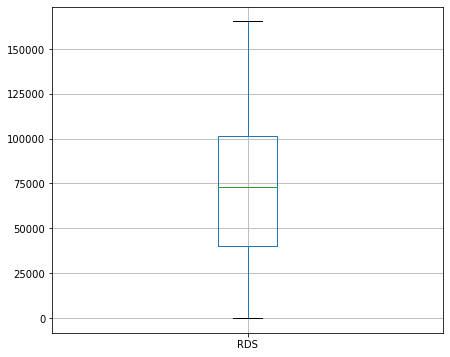

In [7]:
#if outliers are present in R&D_S column
plt.figure(figsize = (7,6))

data.boxplot(column=['RDS'])

plt.show()

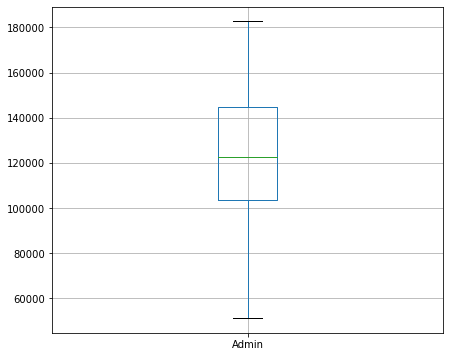

In [8]:
plt.figure(figsize = (7,6))

data.boxplot(column=['Admin'])

plt.show()

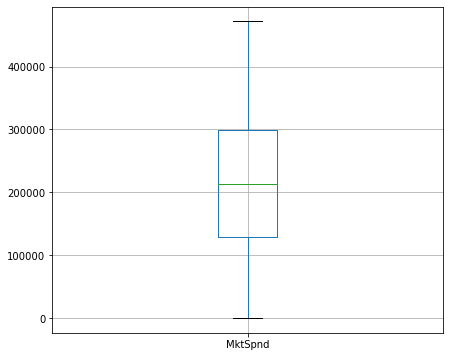

In [9]:
plt.figure(figsize = (7,6))

data.boxplot(column=['MktSpnd'])

plt.show()

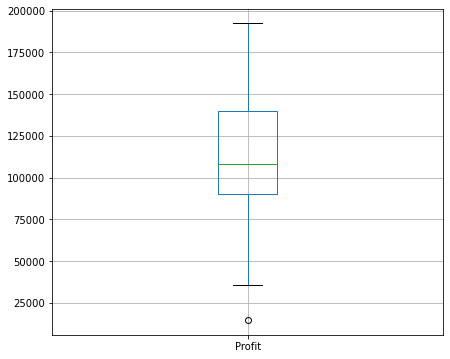

In [10]:
plt.figure(figsize = (7,6))

data.boxplot(column=['Profit'])

plt.show()

#### Checking if the data is normally distributed

C:\Users\Prabhu N\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Prabhu N\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Prabhu N\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

<AxesSubplot:xlabel='Profit', ylabel='Density'>

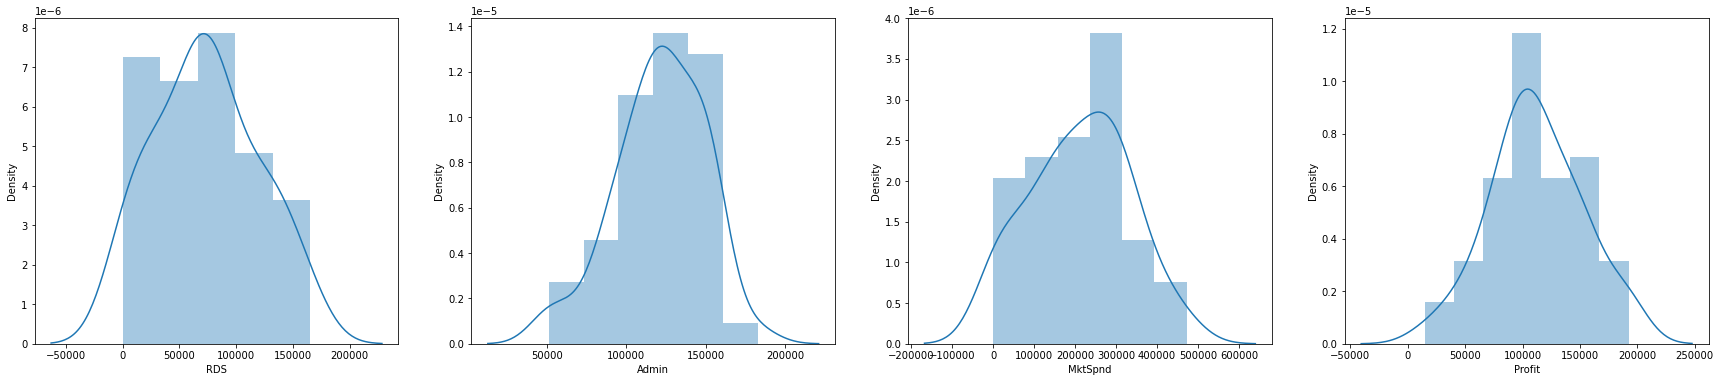

In [11]:
plt.figure(figsize = (30,6))
plt.subplot(1,4,1)
sns.distplot(data['RDS'])
plt.subplot(1,4,2)
sns.distplot(data['Admin'])
plt.subplot(1,4,3)
sns.distplot(data['MktSpnd'])
plt.subplot(1,4,4)
sns.distplot(data['Profit'])

### Correlation matrix

In [12]:
data.corr()

,RDS,Admin,MktSpnd,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MktSpnd,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000



### Model 1
#### Linear Model

In [13]:
model1 = smf.ols('Profit~RDS+Admin+MktSpnd', data = data).fit()

#### Coefficients

In [14]:
model1.params

Intercept    50122.192990
RDS              0.805715
Admin           -0.026816
MktSpnd          0.027228
dtype: float64

#### t and p-Values

In [15]:
print(model1.tvalues, '\n', model1.pvalues)

Intercept     7.626218
RDS          17.846374
Admin        -0.525507
MktSpnd       1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
Admin        6.017551e-01
MktSpnd      1.047168e-01
dtype: float64


#### R2 and Adj R2 values

In [16]:
(model1.rsquared,model1.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [17]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           4.53e-30
Time:                        16:56:15   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
MktSpnd        0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
pred1=model1.predict(data)
actual=data.Profit
r1=rmse(pred1,actual)
r1

8855.344489015142

### Residual Analysis

#### Test for Normality of Residuals (Q-Q Plot)

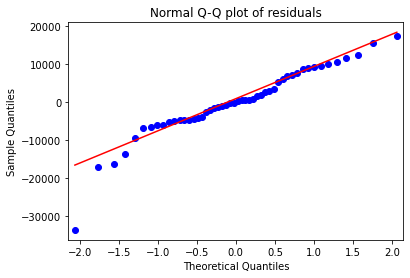

In [19]:
qqplot=sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [20]:
list(np.where(model1.resid<-20000))

[array([49], dtype=int64)]

#### Residual plot for homoscedasticity

In [21]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

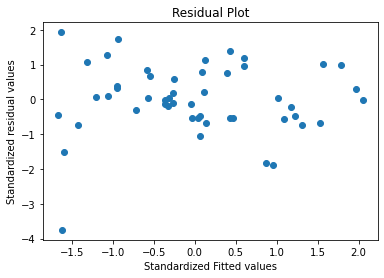

In [22]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Detecting influencers/outliers
## Cook’s Distance

In [23]:
model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance

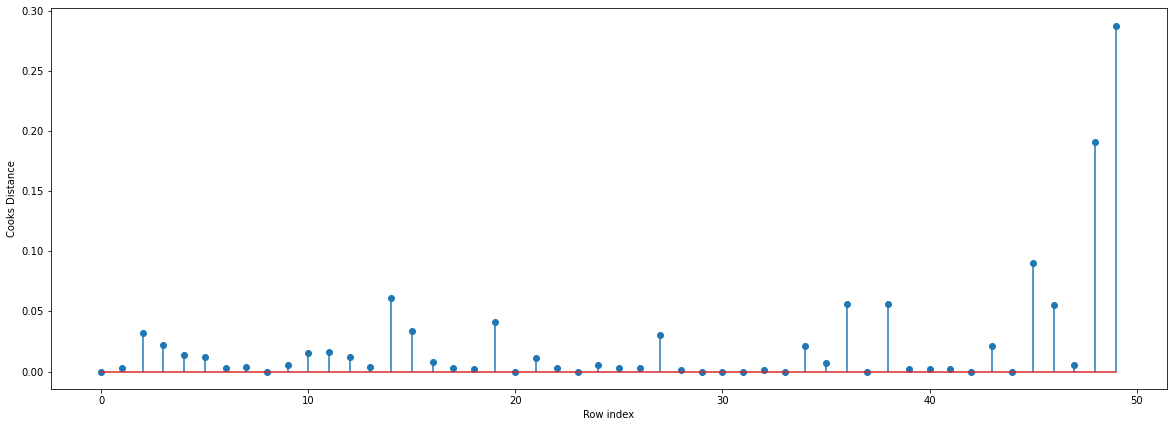

In [24]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [25]:
#index and value of outliers
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

#### Using an influence plot, to detect the outlier in the dataset

### Higher influencing points

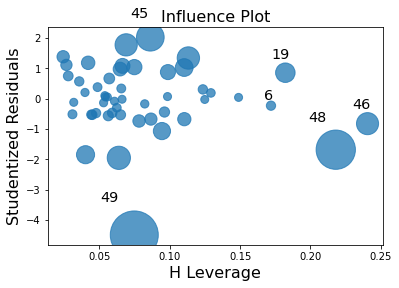

In [26]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [27]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

### We will remove the data at index 49 from our dataset, since its an outlier

In [28]:
data[data.index.isin([49])]

,RDS,Admin,MktSpnd,Profit
49,0.0,116983.8,45173.06,14681.4


In [29]:
startups3=data.drop(data.index[[49]],axis=0).reset_index()

In [30]:
startups3=startups3.drop(['index'],axis=1)

In [31]:
startups3.head()

,RDS,Admin,MktSpnd,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


## Model 2
#### Model, after removing the influencer at index 49

In [32]:
model2 = smf.ols('Profit~RDS+Admin+MktSpnd', data = startups3).fit()

#### Coefficients

In [33]:
model2.params

Intercept    52382.439251
RDS              0.783002
Admin           -0.022201
MktSpnd          0.025234
dtype: float64

In [34]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           8.85e-32
Time:                        16:56:18   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
Admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
MktSpnd        0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
pred2=model2.predict(data)
r2=rmse(pred1,actual)
r2

8855.344489015142

### Model 3
#### Predicing a model excluding Admin and Marketing spend columns, since their p values are greater than 0.05

In [36]:
model3 = smf.ols('Profit~RDS', data = startups3).fit()

In [37]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           7.56e-34
Time:                        16:56:18   Log-Likelihood:                -508.68
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      47   BIC:                             1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.172e+04   2229.914     23.195      0.000    4.72e+04    5.62e+04
RDS            0.8278      0.025     32.477      0.000       0.777       0.879
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### RMSE value

In [38]:
pred2 = model2.predict(startups3.iloc[:,:3])


In [39]:
actual = startups3.Profit

In [40]:
from ml_metrics import rmse
r3=rmse(pred2,actual)
r3

7430.589093678348

### Table of R2 value for all model

In [41]:
df = {'Model':['Model1','Model2','Model3'],'R_Squared Value':(model1.rsquared,model2.rsquared,model3.rsquared),
     "RMSE":(r1,r2,r3)
     }

In [42]:
R_Square_Table = pd.DataFrame(df)
R_Square_Table 

,Model,R_Squared Value,RMSE
0,Model1,0.950746,8855.344489
1,Model2,0.961316,8855.344489
2,Model3,0.957340,7430.589094


### Conclusion:

#### From all the models, it is evident that the model is higher Rsquared value is mdel 2, with a value of 0.961.
#### The RMSE value is lowest in model 3. 
#### Thus, Model2 is the best model to predict profit with a better accuracy, since it has the highest rsquared value.